<a href="https://colab.research.google.com/github/optimistme88/pytorch_tutorial/blob/main/simple_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# IRIS DataSet: https://archive.ics.uci.edu/dataset/53/iris

import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a Model class that inherits nn.Module

class Model(nn.Module):
  # Input layer: 4 features of the flower
  # Hidden layer1: Number of neurons 8
  # Hidden layer2: Number of neurons 9
  # Output layer: 3 classes of output flowers
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate nn.Module
    # fc: fully connected
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))

    return x

In [105]:
# Pick a manual seed for randomization

torch.manual_seed(42)
# Create an instance of the model
model = Model()

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
# Load data from url https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [108]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [109]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [110]:
# Change last column from strings to floats
#pd.set_option('future.no_silent_downcasting', True)
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)

my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [111]:
# Train, test and split! Set X, Y

X = my_df.drop('variety', axis=1)
Y = my_df['variety']

X
Y

# Convert these to numpy arrays

X = X.values
y = Y.values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

Epoch: 0 and loss: 1.098449468612671
Epoch: 10 and loss: 0.9633086323738098
Epoch: 20 and loss: 0.8413244485855103
Epoch: 30 and loss: 0.732008159160614
Epoch: 40 and loss: 0.6329983472824097
Epoch: 50 and loss: 0.505303680896759
Epoch: 60 and loss: 0.37701380252838135
Epoch: 70 and loss: 0.25625547766685486
Epoch: 80 and loss: 0.15755051374435425
Epoch: 90 and loss: 0.1062978059053421


Text(0.5, 0, 'Epoch')

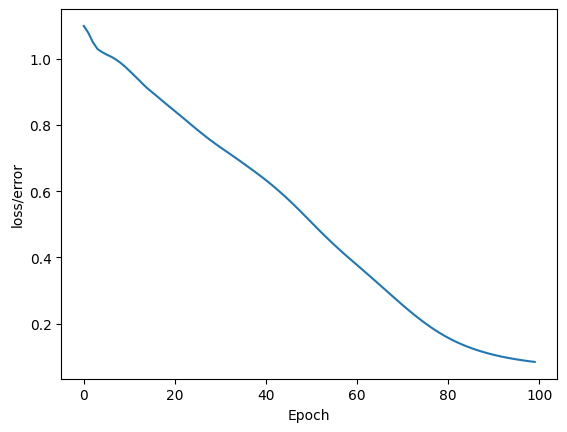

In [112]:
from sklearn.model_selection import train_test_split
import numpy as np

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X features to Float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert Y labels to LongInt
X_test
y_train = torch.from_numpy(y_train.astype(np.int64))
y_test = torch.from_numpy(y_test.astype(np.int64))

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Set the criterion of model to measure the error, how far off predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs).,
# lower our learning rate.)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train our model!
# Epochs? (one run through all the training data in our network)
epochs = 100
losses = []

for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)

  # keep track of our losses
  losses.append(loss.detach().numpy())

  # print ever 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take error rate of forward propagation and feed it back
  # through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')



In [113]:
# Evaluate model on test data set (Validate model on test set)
with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions

  loss = criterion(y_eval, y_test) # Find the loss or error

loss

tensor(0.0862)

In [115]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'test {i+1}, {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

  print(f'we got {correct} correct predictions!')

test 1, tensor([0.0000, 6.0536, 3.4665]) 	 1 	 1
test 2, tensor([12.4891,  7.5753,  0.0000]) 	 0 	 0
test 3, tensor([ 0.0000,  6.0775, 15.1515]) 	 2 	 2
test 4, tensor([0.0000, 5.8888, 3.7769]) 	 1 	 1
test 5, tensor([0.0000, 6.5576, 3.6803]) 	 1 	 1
test 6, tensor([11.7598,  7.0840,  0.0000]) 	 0 	 0
test 7, tensor([1.8780, 5.9147, 0.0000]) 	 1 	 1
test 8, tensor([0.0000, 6.1634, 7.6828]) 	 2 	 2
test 9, tensor([0.0000, 5.6765, 5.3423]) 	 1 	 1
test 10, tensor([0.9510, 5.9596, 0.9208]) 	 1 	 1
test 11, tensor([0.0000, 6.0323, 6.7585]) 	 2 	 2
test 12, tensor([10.8571,  6.4758,  0.0000]) 	 0 	 0
test 13, tensor([12.1213,  7.3276,  0.0000]) 	 0 	 0
test 14, tensor([11.0517,  6.6070,  0.0000]) 	 0 	 0
test 15, tensor([11.6800,  7.0302,  0.0000]) 	 0 	 0
test 16, tensor([0.0000, 6.2765, 3.5047]) 	 1 	 1
test 17, tensor([ 0.0000,  5.5757, 10.9591]) 	 2 	 2
test 18, tensor([0.5346, 5.7192, 1.3288]) 	 1 	 1
test 19, tensor([0.0000, 5.6744, 3.6514]) 	 1 	 1
test 20, tensor([ 0.0000,  5.4283, 